<a href="https://colab.research.google.com/github/Pratt33/ML_Algorithms_From_Scratch/blob/main/Ridge_Regression_n_Dim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Objectives

- Develop a predictive model for diabetes progression using Ridge Regression.

- Improve model generalization by reducing overfitting through regularization.

- Analyze feature importance to understand the impact of medical parameters on diabetes.

- Provide an interpretable model for medical practitioners and researchers.

# Problem Statement

We aim to predict diabetes progression based on various medical features using a Ridge Regression model. The goal is to build a reliable regression model that minimizes prediction errors and provides insights into how different factors contribute to diabetes progression.

# Business Constraints

- Accuracy vs. Interpretability: The model should balance predictive performance and explainability.

- Computational Efficiency: The model should be efficient enough to be deployed in healthcare applications.

- Data Availability: The dataset is limited, so robust regularization is necessary to prevent overfitting.

- Ethical Considerations: Ensure fairness in predictions without bias toward any specific group.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True)

In [3]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Load dataset
X, y = load_diabetes(return_X_y=True)

In [5]:
# Standardization of Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Hyperparameter Tuning using RidgeCV
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], store_cv_values=True)
ridge_cv.fit(X_train_scaled, y_train)
best_alpha = ridge_cv.alpha_
print(f"Best Alpha: {best_alpha}")

Best Alpha: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [7]:
class MyRidge:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis=1)  # Adding bias term
        I = np.identity(X_train.shape[1])
        I[0][0] = 0  # Don't regularize bias
        result = np.linalg.inv(X_train.T @ X_train + self.alpha * I) @ X_train.T @ y_train
        self.intercept_ = result[0]  # First element is intercept
        self.coef_ = result[1:]  # Remaining are coefficients

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [8]:
# Train Ridge Regression with Best Alpha
reg = MyRidge(alpha=best_alpha)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)

In [9]:
# Model Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R2 Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

R2 Score: 0.4541
Mean Squared Error: 2892.0146


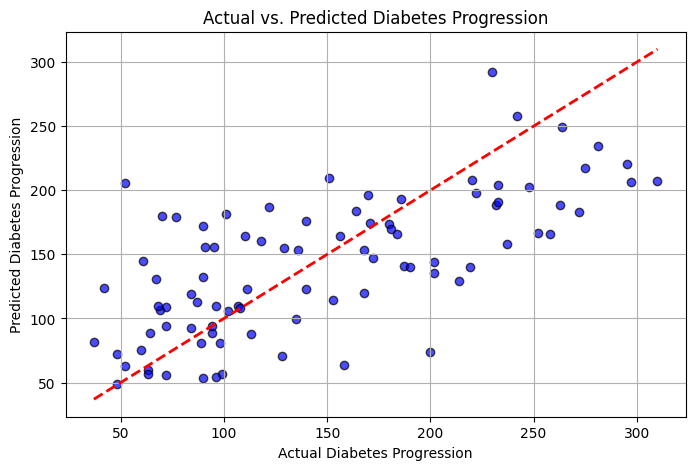

In [10]:
# Visualization: Actual vs. Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Actual Diabetes Progression")
plt.ylabel("Predicted Diabetes Progression")
plt.title("Actual vs. Predicted Diabetes Progression")
plt.grid(True)
plt.show()

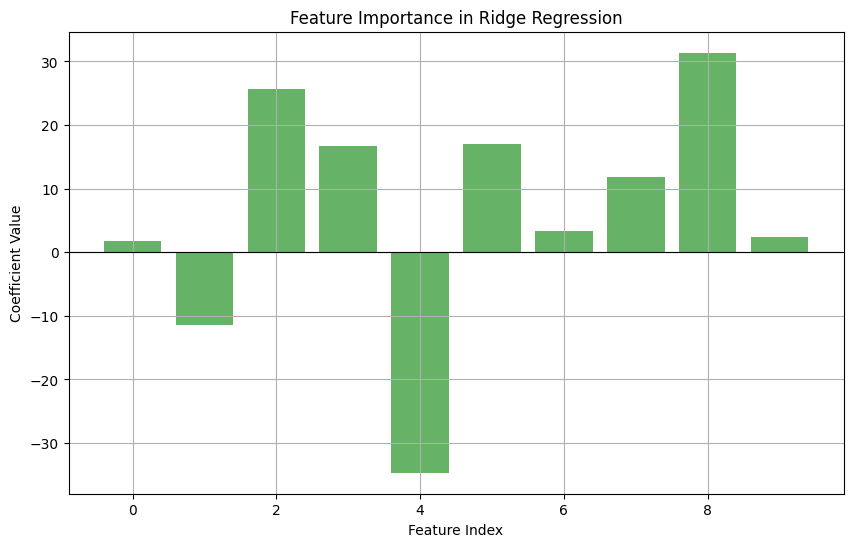

In [11]:
# Feature Importance Visualization
plt.figure(figsize=(10, 6))
plt.bar(range(len(reg.coef_)), reg.coef_, color='green', alpha=0.6)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance in Ridge Regression")
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(True)
plt.show()

# Conclusion

- Ridge Regression provides a stable model for predicting diabetes progression while reducing overfitting.

- Feature importance analysis can help medical professionals understand which factors contribute the most.

- Improvements can be made through hyperparameter tuning and feature engineering.